<a href="https://www.kaggle.com/code/mh0386/logistic-regression-with-k-fold?scriptVersionId=244761557" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Imports

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd
from matplotlib.pyplot import plot as plt
import sys

2025-06-10 20:14:40.649867: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749586480.850436      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749586480.906313      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Standardization

In [2]:
def standardize(x):
    return (x - np.mean(x)) / np.std(x)

# Prediction

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
def predict(X, W, B):
    pred = sigmoid(np.dot(X, W) + B)
    return pred

# Cost Function

In [5]:
def cost(y, y_hat):
    return np.mean(
        -y * np.log(y_hat + sys.float_info.min)
        - (1 - y) * np.log(1 - y_hat + sys.float_info.min)
    )

# Train

In [6]:
def train(X, y, learning_rate, epochs):
    W = np.random.rand(X.shape[1], y.shape[1])
    B = np.random.random()
    costs = np.array([])
    for i in range(epochs):
        y_hat = predict(X, W, B)
        dW = np.dot(X.T, (y_hat - y)) / len(X)
        db = np.mean(y_hat - y)
        W -= learning_rate * dW
        B -= learning_rate * db
        if i % 100 == 0:
            costValue: float = cost(y, y_hat)
            costs = np.append(costs, costValue)
            print(f"Cost at epoch {i}: {costValue}")
    return W, B, costs

# Train with L1 Regularization

In [7]:
def train_L1(X, y, learning_rate, epochs, Lambda):
    W = np.random.random(X.shape[1])
    B = np.random.random()
    costs = np.array([])
    for i in range(epochs):
        y_hat = predict(X, W, B)
        dW = np.dot(X.T, (y_hat - y)) / len(X)
        db = np.mean(y_hat - y)
        W -= learning_rate * (dW + Lambda * np.sign(W))
        B -= learning_rate * db
        if i % 100 == 0:
            costValue: float = cost(y, y_hat)
            costs = np.append(costs, costValue)
            print(f"Cost at epoch {i}: {costValue}")
    return W, B, costs

# Mini_Batch Gradient Descent

In [8]:
def train_mini_batch(X, y, learning_rate, epochs, batch_size):
    W = np.random.random(X.shape[1])
    B = np.random.random()
    costs = np.array([])
    for i in range(epochs):
        for j in range(0, len(X), batch_size):
            X_batch = X[j : j + batch_size]
            y_batch = y[j : j + batch_size]
            y_hat = predict(X_batch, W, B)
            dW = np.dot(X_batch.T, (y_hat - y_batch)) / len(X_batch)
            db = np.mean(y_hat - y_batch)
            W -= learning_rate * dW
            B -= learning_rate * db
            if i % 100 == 0:
                costValue: float = cost(y, y_hat)
                costs = np.append(costs, costValue)
                print(f"Cost at epoch {i}: {costValue}")
    return W, B, costs

# RMS Prop

In [9]:
def train_rms_prop(X, y, learning_rate, epochs, beta, epsilon=sys.float_info.min):
    W = np.random.random(X.shape[1])
    B = np.random.random()
    costs = np.array([])
    vW = np.zeros(X.shape[1])
    vB = 0
    for i in range(epochs):
        y_hat = predict(X, W, B)
        dW = np.dot(X.T, (y_hat - y)) / len(X)
        dB = np.mean(y_hat - y)
        vW = beta * vW + (1 - beta) * dW**2
        vB = beta * vB + (1 - beta) * dB**2
        W -= learning_rate * dW / (np.sqrt(vW) + epsilon)
        B -= learning_rate * dB / (np.sqrt(vB) + epsilon)
        if i % 100 == 0:
            costValue: float = cost(y, y_hat)
            costs = np.append(costs, costValue)
            print(f"Cost at epoch {i}: {costValue}")
    return W, B, costs

# Adam

In [10]:
def train_adam(X, y, learning_rate, epochs, beta1, beta2, epsilon=sys.float_info.min):
    W = np.random.random(X.shape[1])
    B = np.random.random()
    costs = np.array([])
    vW = np.zeros(X.shape[1])
    vB = 0
    sW = np.zeros(X.shape[1])
    sB = 0
    for i in range(epochs):
        y_hat = predict(X, W, B)
        dW = np.dot(X.T, (y_hat - y)) / len(X)
        dB = np.mean(y_hat - y)
        vW = beta1 * vW + (1 - beta1) * dW
        vB = beta1 * vB + (1 - beta1) * dB
        sW = beta2 * sW + (1 - beta2) * dW**2
        sB = beta2 * sB + (1 - beta2) * dB**2
        vW_corrected = vW / (1 - beta1 ** (i + 1))
        vB_corrected = vB / (1 - beta1 ** (i + 1))
        sW_corrected = sW / (1 - beta2 ** (i + 1))
        sB_corrected = sB / (1 - beta2 ** (i + 1))
        W -= learning_rate * vW_corrected / (np.sqrt(sW_corrected) + epsilon)
        B -= learning_rate * vB_corrected / (np.sqrt(sB_corrected) + epsilon)
        if i % 100 == 0:
            costValue: float = cost(y, y_hat)
            costs = np.append(costs, costValue)
            print(f"Cost at epoch {i}: {costValue}")
    return W, B, costs

# Test

In [11]:
def test(X, y, W, b):
    y_hat = predict(X, W, b)
    return accuracy(y, y_hat)

# Accuracy

In [12]:
def accuracy(y, y_hat):
    return np.mean(y == y_hat)

# Loading the data

In [13]:
trainSet, testSet = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
xTrain = trainSet[0].astype("float32")
yTrain = trainSet[1].astype("int32")

xTest = testSet[0].astype("float32")
yTest = testSet[1].astype("int32")

xTrain = xTrain.reshape(xTrain.shape[0], -1)
xTest = xTest.reshape(xTest.shape[0], -1)

xTrain = standardize(xTrain)
xTest = standardize(xTest)

p1 = np.random.permutation(len(xTrain))
p2 = np.random.permutation(len(xTest))

xTrain = xTrain[p1]
yTrain = yTrain[p1]

xTest = xTest[p2]
yTest = yTest[p2]

In [15]:
xTrain

array([[-0.4240739, -0.4240739, -0.4240739, ..., -0.4240739, -0.4240739,
        -0.4240739],
       [-0.4240739, -0.4240739, -0.4240739, ..., -0.4240739, -0.4240739,
        -0.4240739],
       [-0.4240739, -0.4240739, -0.4240739, ..., -0.4240739, -0.4240739,
        -0.4240739],
       ...,
       [-0.4240739, -0.4240739, -0.4240739, ..., -0.4240739, -0.4240739,
        -0.4240739],
       [-0.4240739, -0.4240739, -0.4240739, ..., -0.4240739, -0.4240739,
        -0.4240739],
       [-0.4240739, -0.4240739, -0.4240739, ..., -0.4240739, -0.4240739,
        -0.4240739]], dtype=float32)

In [16]:
yTrain

array([9, 4, 3, ..., 9, 8, 7], dtype=int32)

In [17]:
yTrain = pd.get_dummies(yTrain)
yTrain = yTrain.astype("int32")
yTrain

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
59995,0,1,0,0,0,0,0,0,0,0
59996,0,0,0,0,1,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,1
59998,0,0,0,0,0,0,0,0,1,0


# K-Fold Cross-Validation

In [18]:
def k_fold_cross_validation(X, y, K, lr, epochs):
    fold_size = len(X) // K
    accuracies = []
    for i in range(K):
        # Divide the data into training and testing sets
        X_train = np.concatenate([X[: i * fold_size], X[(i + 1) * fold_size :]])
        Y_train = np.concatenate([y[: i * fold_size], y[(i + 1) * fold_size :]])
        x_valid = X[i * fold_size : (i + 1) * fold_size]
        y_valid = y[i * fold_size : (i + 1) * fold_size]
        # Train the model
        print(f"\nTraining at Iteration {i + 1} of {K}")
        w, b, Costs = train(X_train, Y_train, lr, epochs)
        # Test the model
        print(f"\nTesting at Iteration {i + 1} of {K}")
        acc = test(x_valid, y_valid, w, b)
        print(f"Accuracy at Iteration {i + 1} of {K}: {acc}")
        accuracies.append(acc)
    return np.mean(accuracies), Costs

# Running Code

K-Fold Cross Validation with 10 Folds and eta 0.1:

Training at Iteration 1 of 10
Cost at epoch 0: 156.5555147706555
Cost at epoch 100: 1.990999583955128
Cost at epoch 200: 0.9739657228605839
Cost at epoch 300: 0.6739993677371374
Cost at epoch 400: 0.5325481856748995
Cost at epoch 500: 0.42971135544434114
Cost at epoch 600: 0.36299808245692045
Cost at epoch 700: 0.3107684536062167
Cost at epoch 800: 0.27450864889925275
Cost at epoch 900: 0.24780245723711916

Testing at Iteration 1 of 10
Accuracy at Iteration 1 of 10: 0.009816666666666666

Training at Iteration 2 of 10
Cost at epoch 0: 164.30171020613975
Cost at epoch 100: 2.0331053069939493
Cost at epoch 200: 1.008307272474163
Cost at epoch 300: 0.6910118460833558
Cost at epoch 400: 0.5342808769530699
Cost at epoch 500: 0.4364385724876662
Cost at epoch 600: 0.37021034174611284
Cost at epoch 700: 0.3212043058576225
Cost at epoch 800: 0.2870872497308669
Cost at epoch 900: 0.25389038303257344

Testing at Iteration 2 of 10
Accuracy at Iter

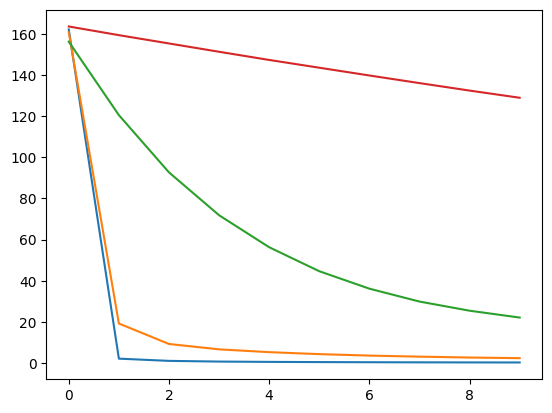

In [19]:
k = 10
iterations = 1000
LRs = [0.1, 0.01, 0.001, 0.0001]
for lr in LRs:
    print(f"K-Fold Cross Validation with {k} Folds and eta {lr}:")
    average_accuracy, c = k_fold_cross_validation(xTrain, yTrain, k, lr, iterations)
    print("\nAverage Accuracy: ", average_accuracy)
    plt(c, label=f"eta = {lr}")